<a href="https://colab.research.google.com/github/isma-tincam/practicasmineria/blob/master/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import missingno as msno
import numpy as np
%matplotlib inline

In [0]:
file = "C:/Users/15-cd005la/Desktop/Diplomado/Modulo 4/vivienda.csv"

In [0]:
df = pd.read_csv(file)

C:\Users\15-cd005la\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.head()

,folioviv,tipo_viv,condominio,elevador,mat_pared,mat_techos,mat_pisos,ais_techos,ais_pared,ais_ventan,...,tv_paga,auto_pick,tot_hog,ubica_geo,ageb,tam_loc,est_socio,est_dis,upm,factor
0,100008010,1,,,8,9,3,2,2,2,...,2,1,1,10010000,000-0,1,4,8,1,221
1,100008034,1,,,8,9,3,1,2,2,...,1,1,1,10010000,000-0,1,4,8,1,221
2,100008077,1,,,8,9,3,9,9,2,...,1,1,1,10010000,000-0,1,4,8,1,221
3,100025016,1,,,8,9,3,1,2,2,...,2,1,1,10010000,000-0,1,3,7,2,194
4,100025022,1,,,8,9,3,2,2,2,...,1,1,1,10010000,000-0,1,3,7,2,194


In [0]:
df_copy = df.copy()

In [0]:
df_copy.shape

(56680, 110)

In [0]:
df_copy.shape[0]

56680

In [0]:
df_copy.shape[1]

110

In [0]:
df_copy.columns

Index(['folioviv', 'tipo_viv', 'condominio', 'elevador', 'mat_pared',
       'mat_techos', 'mat_pisos', 'ais_techos', 'ais_pared', 'ais_ventan',
       ...
       'tv_paga', 'auto_pick', 'tot_hog', 'ubica_geo', 'ageb', 'tam_loc',
       'est_socio', 'est_dis', 'upm', 'factor'],
      dtype='object', length=110)

In [0]:
list(df_copy.columns)

['folioviv',
 'tipo_viv',
 'condominio',
 'elevador',
 'mat_pared',
 'mat_techos',
 'mat_pisos',
 'ais_techos',
 'ais_pared',
 'ais_ventan',
 'ais_otro',
 'antiguedad',
 'cocina',
 'cocina_dor',
 'cuart_dorm',
 'num_cuarto',
 'disp_agua',
 'dotac_agua',
 'excusado',
 'uso_compar',
 'sanit_agua',
 'bano_comp',
 'bano_excus',
 'bano_regad',
 'drenaje',
 'disp_elect',
 'anio_panel',
 'panel_ne',
 'pot_panel',
 'potencia',
 'focos_inca',
 'focos_ahor',
 'combustible',
 'estufa_chi',
 'eli_basura',
 'lavadero',
 'fregadero',
 'regadera',
 'rega_elect',
 'tinaco_azo',
 'cisterna',
 'pileta',
 'calent_sol',
 'calent_gas',
 'medidor_luz',
 'bomba_agua',
 'tanque_gas',
 'aire_acond',
 'calefacc',
 'chimenea',
 'repar_pard',
 'repar_tech',
 'repar_agua',
 'repar_dren',
 'repar_cabl',
 'const_dorm',
 'const_coci',
 'const_bano',
 'const_neg',
 'comun1',
 'comun2',
 'comun3',
 'comun4',
 'comun5',
 'comun6',
 'comun7',
 'comun8',
 'comun9',
 'estaciona',
 'comun10',
 'comun11',
 'comun12',
 'comun

In [0]:
df_copy['tel_fijo'].value_counts()

2    37355
1    19325
Name: tel_fijo, dtype: int64

In [0]:
df_copy['tel_fijo'].unique()

array([1, 2], dtype=int64)

In [0]:
l = []
bandera = np.NAN
for column in df_copy.columns:
    if df_copy[column].dtype == np.int64:
        bandera = 'entero'
    elif df_copy[column].dtype == np.float64:
        bandera = 'flotante'
    else:
        bandera = 'otro'
        
    try:
        df_copy[column] =df_copy[column].astype('int64')
    except:
        l.append(column)
        
    print('COLUMNA: ', column)
    print('TIPO: ', bandera)
    print('NUNIQUE: ', df_copy[column].nunique())
    print('UNIQUE: ', df_copy[column].unique())
    print('VALUE COUNTS ', df_copy[column].value_counts())
    print('\n')

COLUMNA:  folioviv
TIPO:  entero
NUNIQUE:  56680
UNIQUE:  [ 100008010  100008034  100008077 ... 3260737208 3260737210 3260737211]
VALUE COUNTS  1412184057    1
3060078007    1
2900807116    1
3202046090    1
3200448001    1
             ..
1901026056    1
502425042     1
300437027     1
504127009     1
2701787136    1
Name: folioviv, Length: 56680, dtype: int64


COLUMNA:  tipo_viv
TIPO:  otro
NUNIQUE:  6
UNIQUE:  ['1' '2' '3' '&' '4' '5']
VALUE COUNTS  1    53650
2     2416
3      482
&      114
4       12
5        6
Name: tipo_viv, dtype: int64


COLUMNA:  condominio
TIPO:  otro
NUNIQUE:  19
UNIQUE:  [' ' '04' '02' '03' '05' '07' '22' '06' '08' '12' '09' '13' '10' '11' '16'
 '15' '14' '24' '23']
VALUE COUNTS        54150
02     1065
03      594
04      494
05      268
06       53
07       26
12        7
08        5
09        4
10        4
11        3
14        1
16        1
24        1
13        1
22        1
23        1
15        1
Name: condominio, dtype: int64


COLUMNA:  elevador

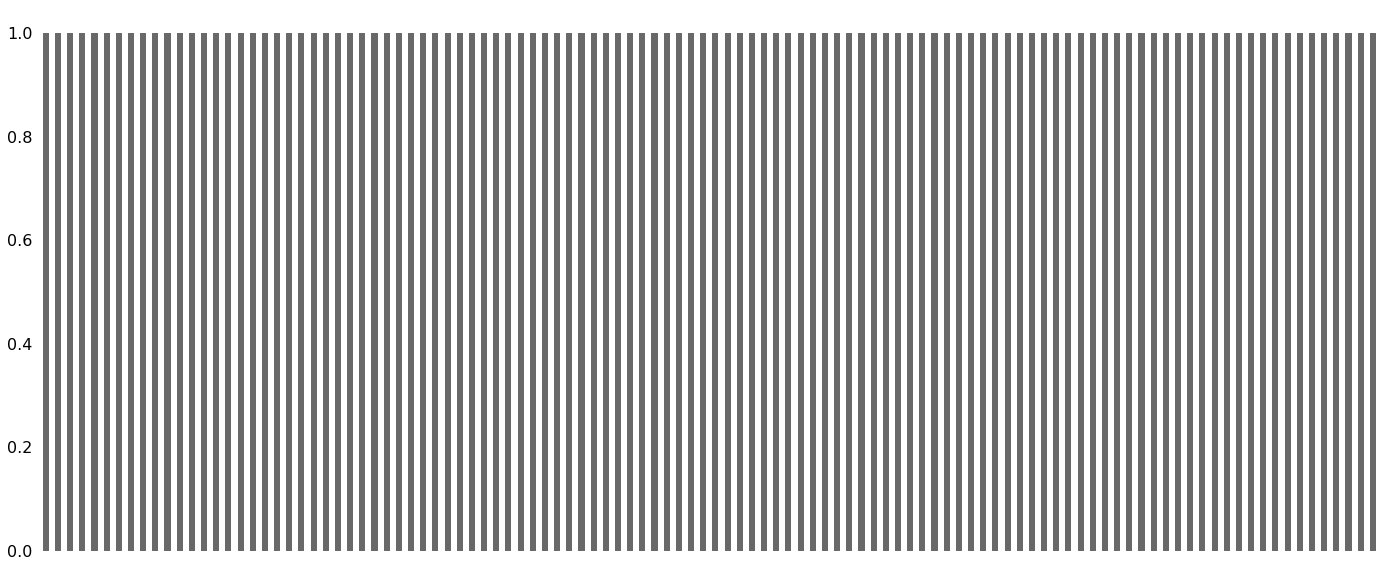

In [0]:
msno.bar(df_copy)

In [0]:
df_copy.isnull().any().any()

False

In [0]:
df_copy.replace(to_replace='&', value=np.nan, inplace=True)

In [0]:
df_copy.replace(to_replace=' ', value=np.nan, inplace=True)

In [0]:
df_copy.isnull().any().any()

True

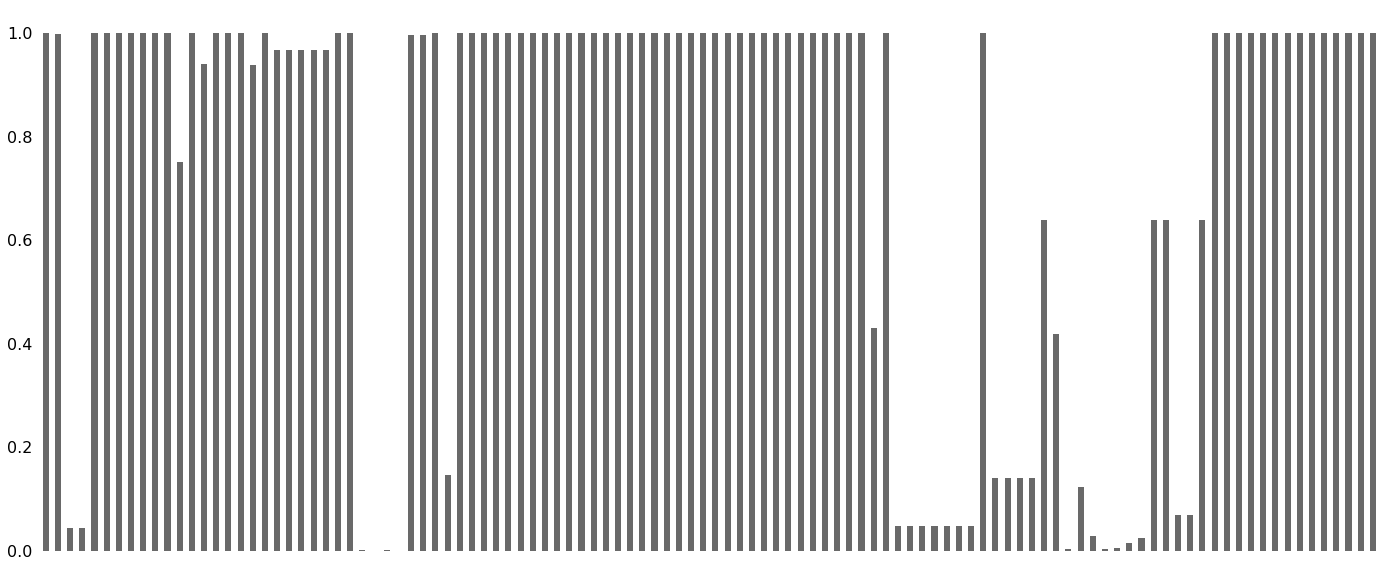

In [0]:
msno.bar(df_copy)

In [0]:
file = 'C:/Users/15-cd005la/Desktop/Diplomado/Modulo 4/vivienda_load.csv'

In [0]:
df_copy.to_csv(file)

In [0]:
df_copy.fillna(value=-1, inplace=True)

In [0]:
threshold = round(df_copy.shape[0]*.75)
threshold

42510

In [0]:
l = []
for column in df_copy.columns:
    na_column =  df_copy[column].value_counts().get(-1)
    if(na_column != None):
        print(column, ': ', df_copy.shape[0] - na_column, ' - ', threshold)
        if (df_copy.shape[0] - na_column < threshold):
            print(column, ': ', 'd e l e t e d')
            l.append(column)

tipo_viv :  56566  -  42510
condominio :  2530  -  42510
condominio :  d e l e t e d
elevador :  2530  -  42510
elevador :  d e l e t e d
mat_pisos :  56678  -  42510
antiguedad :  42515  -  42510
cocina_dor :  53256  -  42510
dotac_agua :  53152  -  42510
uso_compar :  54866  -  42510
sanit_agua :  54866  -  42510
bano_comp :  54866  -  42510
bano_excus :  54866  -  42510
bano_regad :  54866  -  42510
anio_panel :  44  -  42510
anio_panel :  d e l e t e d
panel_ne :  9  -  42510
panel_ne :  d e l e t e d
pot_panel :  53  -  42510
pot_panel :  d e l e t e d
potencia :  16  -  42510
potencia :  d e l e t e d
focos_inca :  56428  -  42510
focos_ahor :  56428  -  42510
estufa_chi :  8246  -  42510
estufa_chi :  d e l e t e d
estaciona :  24346  -  42510
estaciona :  d e l e t e d
comun11 :  2753  -  42510
comun11 :  d e l e t e d
comun12 :  2753  -  42510
comun12 :  d e l e t e d
comun13 :  2753  -  42510
comun13 :  d e l e t e d
comun14 :  2753  -  42510
comun14 :  d e l e t e d
comun15 

In [0]:
l

['condominio',
 'elevador',
 'anio_panel',
 'panel_ne',
 'pot_panel',
 'potencia',
 'estufa_chi',
 'estaciona',
 'comun11',
 'comun12',
 'comun13',
 'comun14',
 'comun15',
 'comun16',
 'comun17',
 'pago_renta',
 'anio_res',
 'mes_res',
 'familiar',
 'tipo_adqui',
 'financia_1',
 'financia_2',
 'financia_3',
 'financia_4',
 'financia_5',
 'financia_6',
 'financia_7',
 'financia_8',
 'num_dueno1',
 'hog_dueno1',
 'num_dueno2',
 'hog_dueno2',
 'escrituras',
 'ageb']

In [0]:
df_copy.drop(labels=l, axis=1, inplace=True)

In [0]:
df_copy.replace(to_replace=-1, value=np.NaN, inplace=True)

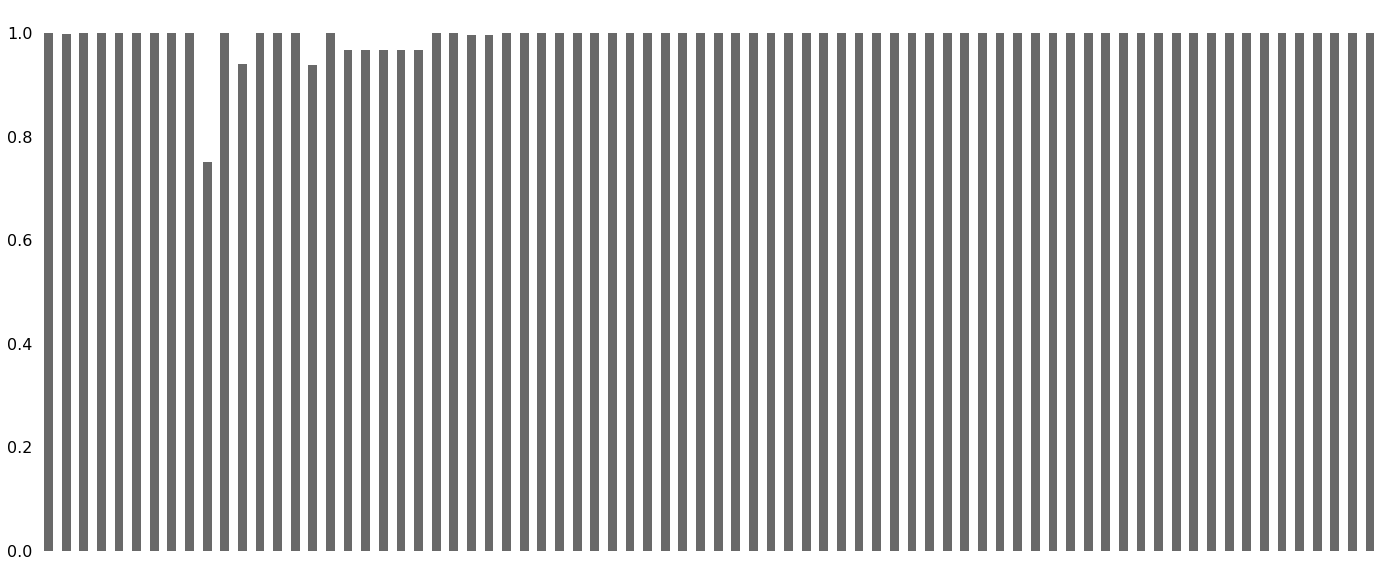

In [0]:
msno.bar(df_copy)

In [0]:
file = 'C:/Users/15-cd005la/Desktop/Diplomado/Modulo 4/vivienda_clean.csv'

In [0]:
df_copy.to_csv(file)

In [0]:
df_copy.dropna(inplace=True)